In [0]:
try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf

TensorFlow is already loaded. Please restart the runtime to change versions.


In [1]:
!pwd
!mkdir finger
%cd finger

/content
/content/finger


In [0]:
!wget https://handtracker.mpi-inf.mpg.de/data/GANeratedDataset_v3.zip

--2019-12-03 17:14:09--  https://handtracker.mpi-inf.mpg.de/data/GANeratedDataset_v3.zip
Resolving handtracker.mpi-inf.mpg.de (handtracker.mpi-inf.mpg.de)... 139.19.206.76
Connecting to handtracker.mpi-inf.mpg.de (handtracker.mpi-inf.mpg.de)|139.19.206.76|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 36214097865 (34G) [application/zip]
Saving to: ‘GANeratedDataset_v3.zip’

GANeratedDataset_v3 100%[===================>]  33.73G  94.0MB/s    in 6m 13s  

2019-12-03 17:20:26 (92.7 MB/s) - ‘GANeratedDataset_v3.zip’ saved [36214097865/36214097865]



In [2]:
!wget https://handtracker.mpi-inf.mpg.de/data/RealHands.zip

--2019-12-04 04:54:32--  https://handtracker.mpi-inf.mpg.de/data/RealHands.zip
Resolving handtracker.mpi-inf.mpg.de (handtracker.mpi-inf.mpg.de)... 139.19.206.76
Connecting to handtracker.mpi-inf.mpg.de (handtracker.mpi-inf.mpg.de)|139.19.206.76|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 32935082344 (31G) [application/zip]
Saving to: ‘RealHands.zip’

RealHands.zip       100%[===================>]  30.67G   104MB/s    in 5m 10s  

2019-12-04 04:59:41 (101 MB/s) - ‘RealHands.zip’ saved [32935082344/32935082344]



In [0]:
!unzip -q GANeratedDataset_v3.zip

In [0]:
!unzip -q RealHands.zip

In [12]:
  
%cd color

total 1372
280 drwxrwxr-- 2 root root 286720 May 22  2017 color
348 drwxrwxr-- 2 root root 352256 May 22  2017 color_on_depth
284 drwxrwxr-- 2 root root 290816 May 22  2017 depth
228 drwxrwxr-- 2 root root 229376 May 22  2017 masks
232 drwxrwxr-- 2 root root 233472 May 22  2017 white


In [0]:
%cd /content/finger/GANeratedHands_Release/data/
!ls -ls
!find noObject/ -type f | wc -l
!find withObject/ -type f | wc -l

total 8
4 drwxr-xr-x 143 root root 4096 Jun  5  2018 noObject
4 drwxr-xr-x 187 root root 4096 Jun  5  2018 withObject
717245
940250


In [15]:
%cd /content/
!mkdir finger3
%cd finger3

/content
/content/finger3


In [13]:
%cd finger/src

/content/finger2/finger/src


In [16]:
%cd /content/finger3/
import os

user = 'dmitryfisko'
password = 'put_path_here'
os.environ['AUTH'] = user + ':' + password
!git clone -v https://$AUTH@github.com/dmitryfisko/finger.git

/content/finger3
Cloning into 'finger'...
POST git-upload-pack (165 bytes)
remote: Enumerating objects: 70, done.
remote: Counting objects: 100% (70/70), done.
remote: Compressing objects: 100% (43/43), done.
remote: Total 70 (delta 33), reused 60 (delta 23), pack-reused 0
Unpacking objects: 100% (70/70), done.


In [17]:
%cd /content/finger3/finger/

/content/finger3/finger


In [18]:
from src2.dataset.gandataset.dataset_tfrecords import create_tfrecords_dataset, count_items_in_tfrecord

DATASET_DIRECTORY = "/content/finger/GANeratedHands_Release/data"
TRAIN_FILE_PATH_TFRECORDS = "/content/ganerated_no_object_train.tfrecords"
TEST_FILE_PATH_TFRECORDS = "/content/ganerated_no_object_test.tfrecords"
TARGET_SIZE = 256

create_tfrecords_dataset(TARGET_SIZE, DATASET_DIRECTORY, TRAIN_FILE_PATH_TFRECORDS, TEST_FILE_PATH_TFRECORDS, 0.9)
print(count_items_in_tfrecord(TRAIN_FILE_PATH_TFRECORDS))
print(count_items_in_tfrecord(TEST_FILE_PATH_TFRECORDS))

version 1
iteration: 0
iteration: 1000
iteration: 2000
iteration: 3000
iteration: 4000
iteration: 5000
iteration: 6000
iteration: 7000
iteration: 8000
iteration: 9000
iteration: 10000
iteration: 11000
iteration: 12000
iteration: 13000
iteration: 14000
iteration: 15000
iteration: 16000
iteration: 17000
iteration: 18000
iteration: 19000
iteration: 20000
iteration: 21000
iteration: 22000
iteration: 23000
iteration: 24000
iteration: 25000
iteration: 26000
iteration: 27000
iteration: 28000
iteration: 29000
iteration: 30000
iteration: 31000
iteration: 32000
iteration: 33000
iteration: 34000
iteration: 35000
iteration: 36000
iteration: 37000
iteration: 38000
iteration: 39000
iteration: 40000
iteration: 41000
iteration: 42000
iteration: 43000
iteration: 44000
iteration: 45000
iteration: 46000
iteration: 47000
iteration: 48000
iteration: 49000
iteration: 50000
iteration: 51000
iteration: 52000
iteration: 53000
iteration: 54000
iteration: 55000
iteration: 56000
iteration: 57000
iteration: 58000


In [3]:
# %cd /
# !mkdir -p dataset
# %cd /dataset

%cd /content/finger/
%cd /content/

!pip3 install awscli --upgrade --user

# id of priv key: priv_key_id
# priv key: priv_key
# us-east-1
!/root/.local/bin/aws configure

# !/root/.local/bin/aws --endpoint-url=https://storage.yandexcloud.net \
#     s3 cp /dataset/train_noobject_full_244.tfrecords s3://hands/dataset/
    
# !/root/.local/bin/aws --endpoint-url=https://storage.yandexcloud.net \
#     s3 cp /dataset/test_noobject_full_244.tfrecords s3://hands/dataset/
  
  
!/root/.local/bin/aws --endpoint-url=https://storage.yandexcloud.net \
    s3 cp /content/finger/RealHands.zip s3://hands/RealHands.zip

# !/root/.local/bin/aws --endpoint-url=https://storage.yandexcloud.net \
#     s3 cp /content/finger/GANeratedDataset_v3.zip s3://hands/GANeratedDataset_v3.zip

# !/root/.local/bin/aws --endpoint-url=https://storage.yandexcloud.net \
#     s3 cp /content/ganerated_no_object_train.tfrecords s3://hands/dataset/ganerated_no_object_100000_train.tfrecords 
    
# !/root/.local/bin/aws --endpoint-url=https://storage.yandexcloud.net \
#     s3 cp /content/ganerated_no_object_test.tfrecords s3://hands/dataset/ganerated_no_object_100000_test.tfrecords


# !/root/.local/bin/aws --endpoint-url=https://storage.yandexcloud.net \
#     s3 rm s3://hands/dataset/ --recursive 

!ls -ls

/content/finger
/content
     |████████████████████████████████| 2.5MB 6.7MB/s 
     |████████████████████████████████| 51kB 7.5MB/s 
     |████████████████████████████████| 5.8MB 35.0MB/s 
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


AWS Access Key ID [None]: 0adSri8hzGzx55I6c0l5
AWS Secret Access Key [None]: TmaxsgwGStyDbgHAtZR0dK1nd0SdMQ5IV557rnBO
Default region name [None]: 
Default output format [None]: 
upload: finger/RealHands.zip to s3://hands/RealHands.zip           
total 8
4 drwxr-xr-x 2 root root 4096 Dec  4 04:54 finger
4 drwxr-xr-x 1 root root 4096 Nov 21 16:30 sample_data


In [28]:
!pip install -q git+https://github.com/tensorflow/examples.git
!pip install -q git+https://github.com/tensorflow/datasets.git 

In [0]:
# !pip install graphviz
# !brew install graphviz

In [0]:
# !conda install -y --file requirements.txt

In [0]:
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

In [0]:
try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf

In [0]:
from __future__ import absolute_import, division, print_function, unicode_literals

from tensorflow_examples.models.pix2pix import pix2pix

import tensorflow_datasets as tfds
tfds.disable_progress_bar()

from IPython.display import clear_output
import matplotlib.pyplot as plt

from PIL import Image

In [0]:
train_dataset = tf.data.TFRecordDataset("/content/ganerated_no_object_train.tfrecords")
test_dataset = tf.data.TFRecordDataset("/content/ganerated_no_object_test.tfrecords")

In [0]:
def normalize(input_image, input_mask):
  input_image = tf.cast(input_image, tf.float32) / 255.0
  return input_image, input_mask

In [0]:
from src.dataset.gandataset.dataset_tfrecords import parse_tfrecord_function


def load_dataset_item(datapoint):
  input_image, input_mask = parse_tfrecord_function(datapoint)
  input_image = tf.image.resize(input_image, (128, 128))
  input_mask = tf.image.resize(input_mask, (128, 128))
  return input_image, input_mask


@tf.function
def load_image_train(datapoint):
  input_image, input_mask = load_dataset_item(datapoint)

  if tf.random.uniform(()) > 0.5:
    input_image = tf.image.flip_left_right(input_image)
    input_mask = tf.image.flip_left_right(input_mask)

  input_image, input_mask = normalize(input_image, input_mask)

  return input_image, input_mask

In [0]:
def load_image_test(datapoint):
  input_image, input_mask = load_dataset_item(datapoint)
  input_image, input_mask = normalize(input_image, input_mask)

  return input_image, input_mask

In [0]:
TRAIN_LENGTH = 89000
BATCH_SIZE = 128
BUFFER_SIZE = 1000
STEPS_PER_EPOCH = TRAIN_LENGTH // BATCH_SIZE

In [0]:
train = train_dataset.map(load_image_train, num_parallel_calls=tf.data.experimental.AUTOTUNE)
test = test_dataset.map(load_image_test)

In [0]:
train_dataset = train.cache().shuffle(BUFFER_SIZE).batch(BATCH_SIZE).repeat()
train_dataset = train_dataset.prefetch(buffer_size=tf.data.experimental.AUTOTUNE)
test_dataset = test.batch(BATCH_SIZE)

In [0]:
def display(display_list):
  plt.figure(figsize=(15, 15))

  title = ['Input Image', 'True Mask', 'Predicted Mask']

  for i in range(len(display_list)):
    plt.subplot(1, len(display_list), i+1)
    plt.title(title[i])
    plt.imshow(tf.keras.preprocessing.image.array_to_img(display_list[i]))
    plt.axis('off')
  plt.show()

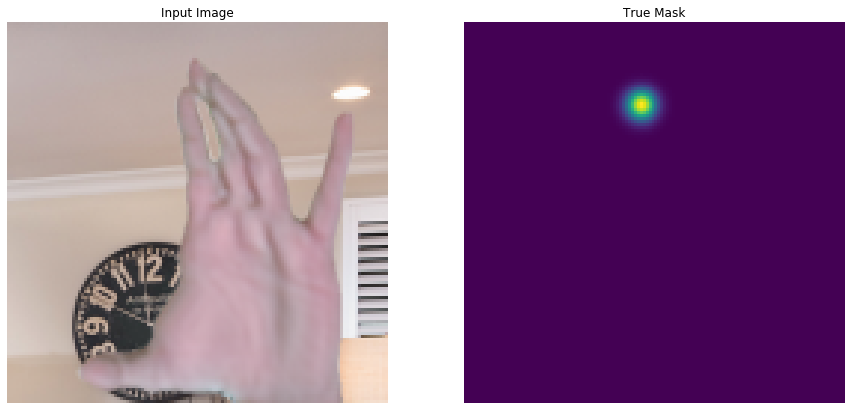

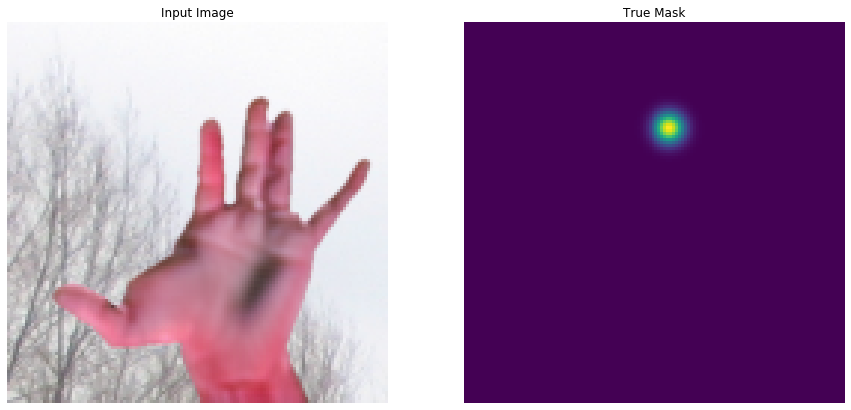

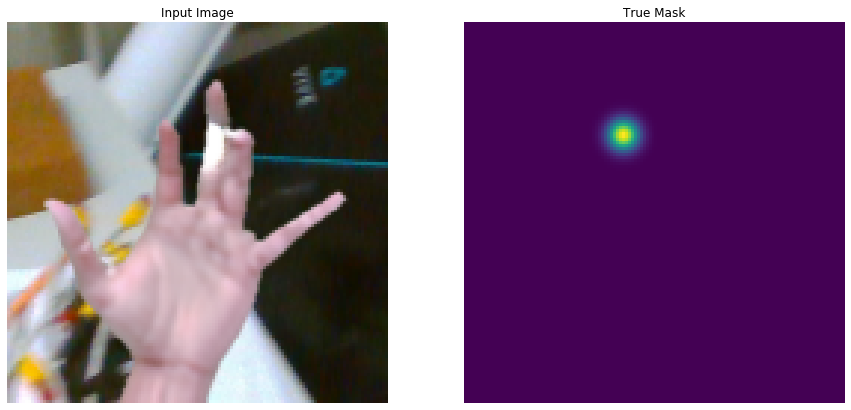

In [41]:
for image, mask in test.take(3):
  sample_image, sample_mask = image, mask
  display([sample_image, sample_mask])

In [0]:
OUTPUT_CHANNELS = 1

In [43]:
base_model = tf.keras.applications.MobileNetV2(input_shape=[128, 128, 3], include_top=False)

# Use the activations of these layers
layer_names = [
    'block_1_expand_relu',   # 64x64
    'block_3_expand_relu',   # 32x32
    'block_6_expand_relu',   # 16x16
    'block_13_expand_relu',  # 8x8
    'block_16_project',      # 4x4
]
layers = [base_model.get_layer(name).output for name in layer_names]

# Create the feature extraction model
down_stack = tf.keras.Model(inputs=base_model.input, outputs=layers)

down_stack.trainable = False

9412608/9406464 [==============================] - 2s 0us/step


In [0]:
up_stack = [
    pix2pix.upsample(512, 3),  # 4x4 -> 8x8
    pix2pix.upsample(256, 3),  # 8x8 -> 16x16
    pix2pix.upsample(128, 3),  # 16x16 -> 32x32
    pix2pix.upsample(64, 3),   # 32x32 -> 64x64
]

In [0]:
def unet_model(output_channels):

  # This is the last layer of the model
  last = tf.keras.layers.Conv2DTranspose(
      output_channels, 3, strides=2,
      padding='same')  #64x64 -> 128x128

  inputs = tf.keras.layers.Input(shape=[128, 128, 3])
  x = inputs

  # Downsampling through the model
  skips = down_stack(x)
  x = skips[-1]
  skips = reversed(skips[:-1])

  # Upsampling and establishing the skip connections
  for up, skip in zip(up_stack, skips):
    x = up(x)
    concat = tf.keras.layers.Concatenate()
    x = concat([x, skip])

  x = last(x)

  return tf.keras.Model(inputs=inputs, outputs=x)

In [0]:
model = unet_model(OUTPUT_CHANNELS)
model.compile(optimizer='adam', loss='mse',
              metrics=['accuracy'])

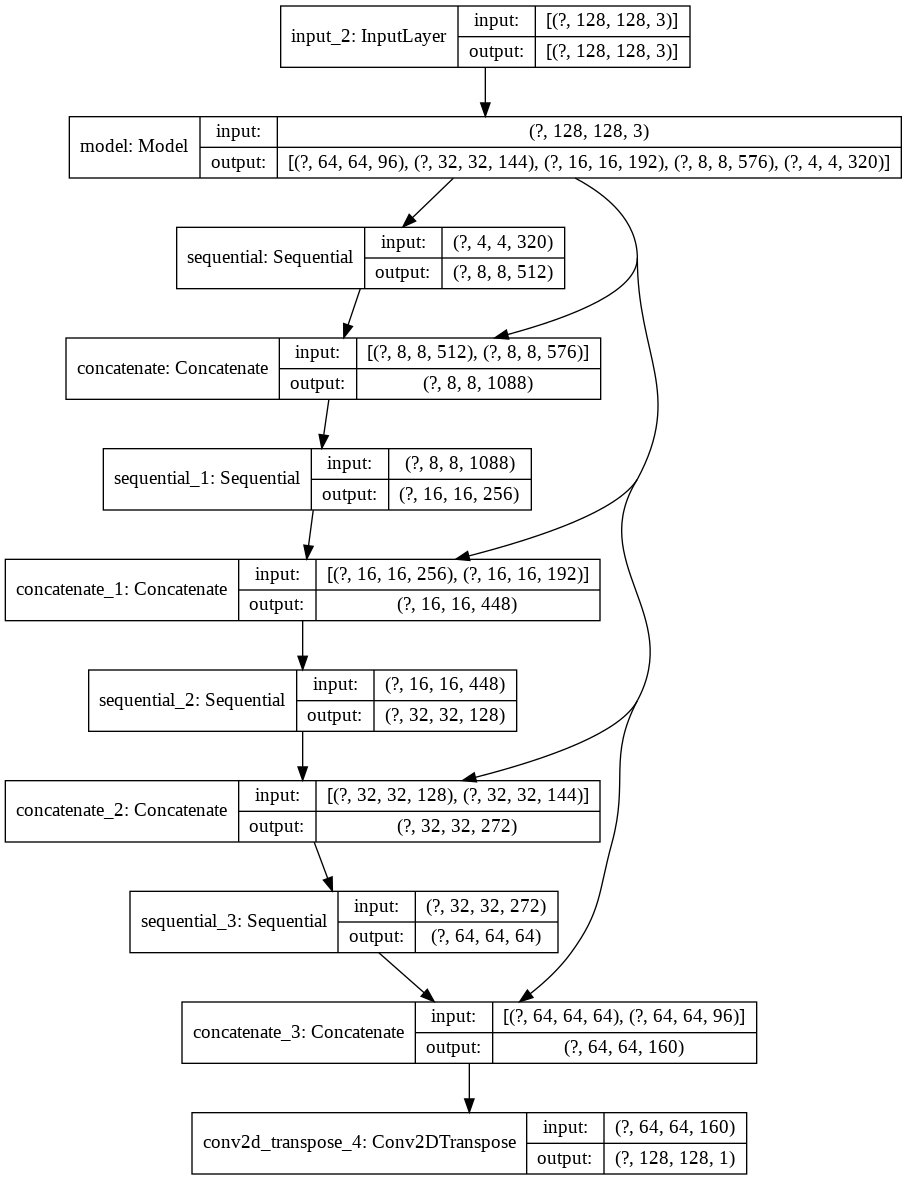

In [47]:
tf.keras.utils.plot_model(model, show_shapes=True)

In [0]:
def show_predictions(dataset=None, num=1):
  for image, mask in test.take(10):
    pred_mask = model.predict(image[tf.newaxis, ...])
    sample_image, sample_mask = image, mask
    display([sample_image, sample_mask, pred_mask[0]])  

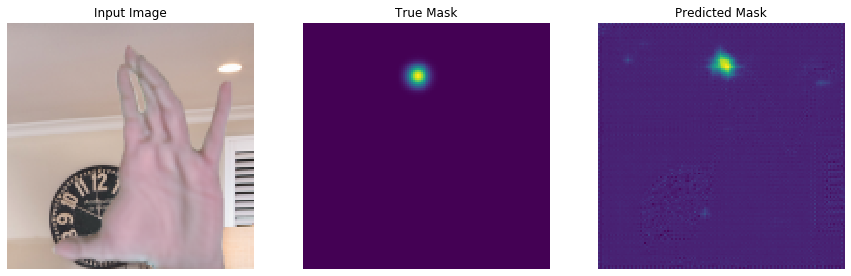

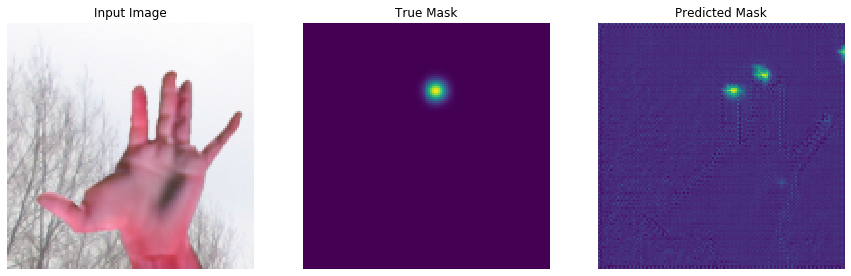

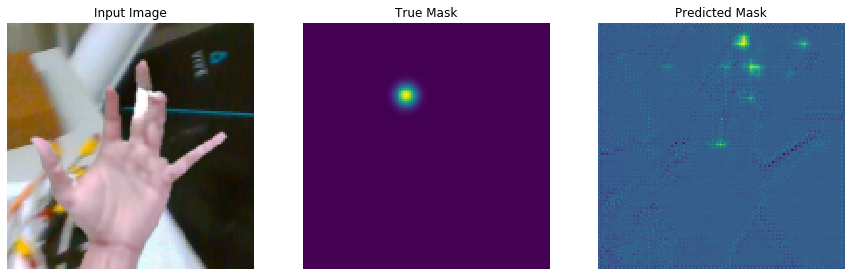

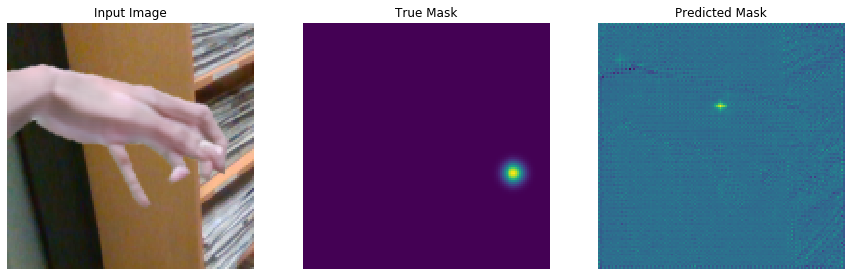

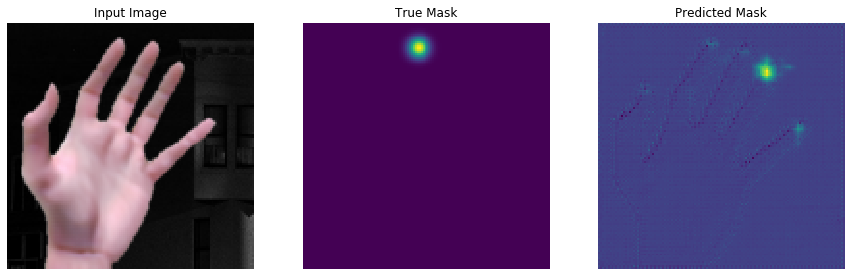

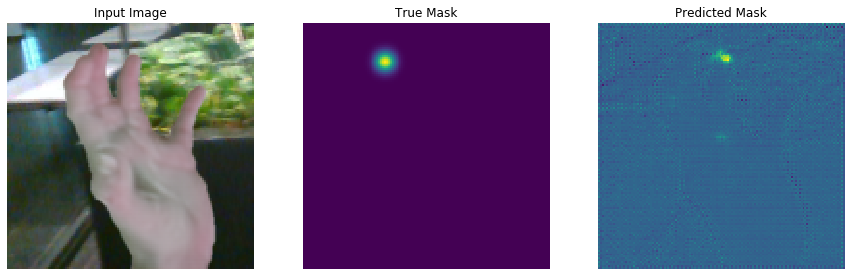

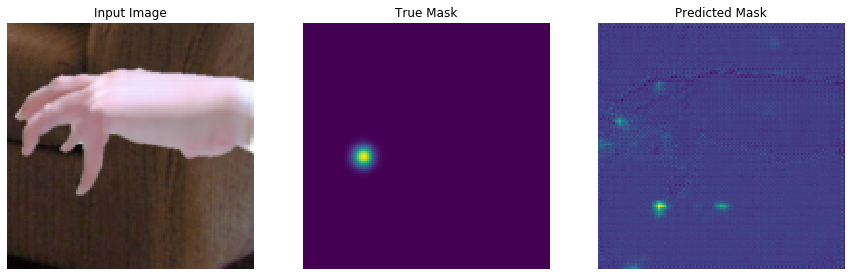

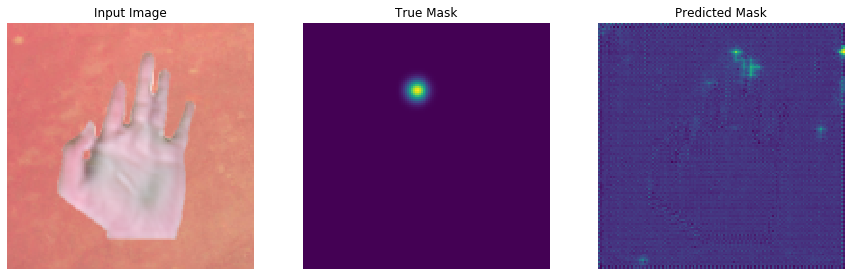

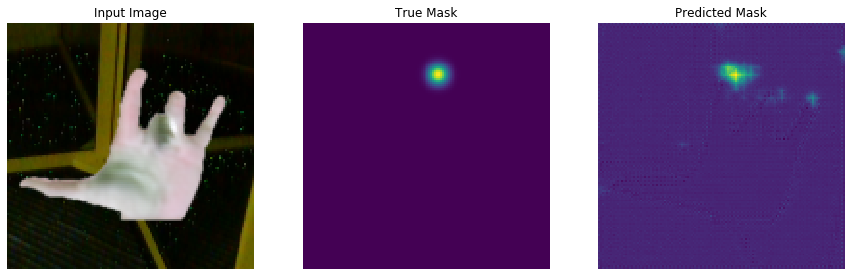

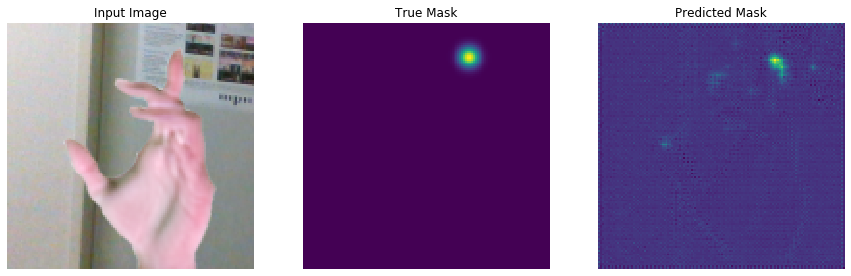

In [57]:
show_predictions()

In [0]:
class DisplayCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs=None):
    clear_output(wait=True)
    show_predictions()
    print ('\nSample Prediction after epoch {}\n'.format(epoch+1))

In [58]:
EPOCHS = 20
VAL_SUBSPLITS = 5
VALIDATION_STEPS = 10000//BATCH_SIZE//VAL_SUBSPLITS

model_history = model.fit(train_dataset, epochs=EPOCHS,
                          steps_per_epoch=STEPS_PER_EPOCH,
                          validation_steps=VALIDATION_STEPS,
                          validation_data=test_dataset)
# callbacks=[DisplayCallback()]

Train for 695 steps, validate for 15 steps
Epoch 1/20
695/695 [==============================] - 319s 458ms/step - loss: 2.8777e-04 - accuracy: 0.6807 - val_loss: 0.0022 - val_accuracy: 0.6793
Epoch 2/20
695/695 [==============================] - 319s 459ms/step - loss: 2.4053e-04 - accuracy: 0.6807 - val_loss: 0.0022 - val_accuracy: 0.6793
Epoch 3/20
695/695 [==============================] - 319s 459ms/step - loss: 2.1979e-04 - accuracy: 0.6807 - val_loss: 0.0021 - val_accuracy: 0.6793
Epoch 4/20
695/695 [==============================] - 318s 458ms/step - loss: 1.9479e-04 - accuracy: 0.6807 - val_loss: 0.0023 - val_accuracy: 0.6793
Epoch 5/20
695/695 [==============================] - 319s 459ms/step - loss: 1.7418e-04 - accuracy: 0.6806 - val_loss: 0.0025 - val_accuracy: 0.6793
Epoch 6/20
695/695 [==============================] - 319s 459ms/step - loss: 1.6475e-04 - accuracy: 0.6807 - val_loss: 0.0023 - val_accuracy: 0.6793
Epoch 7/20
695/695 [==============================] - 319

KeyboardInterrupt: ignored

In [62]:
EPOCHS = 10
VAL_SUBSPLITS = 5
VALIDATION_STEPS = 10000//BATCH_SIZE//VAL_SUBSPLITS

model_history = model.fit(train_dataset, epochs=EPOCHS,
                          steps_per_epoch=STEPS_PER_EPOCH,
                          validation_steps=VALIDATION_STEPS,
                          validation_data=test_dataset)
# callbacks=[DisplayCallback()]

Train for 695 steps, validate for 15 steps
Epoch 1/10
695/695 [==============================] - 319s 460ms/step - loss: 1.3552e-04 - accuracy: 0.6807 - val_loss: 0.0021 - val_accuracy: 0.6793
Epoch 2/10
695/695 [==============================] - 319s 459ms/step - loss: 1.2018e-04 - accuracy: 0.6806 - val_loss: 0.0022 - val_accuracy: 0.6793
Epoch 3/10
695/695 [==============================] - 319s 459ms/step - loss: 1.2932e-04 - accuracy: 0.6807 - val_loss: 0.0022 - val_accuracy: 0.6793
Epoch 4/10
695/695 [==============================] - 317s 457ms/step - loss: 1.2129e-04 - accuracy: 0.6807 - val_loss: 0.0023 - val_accuracy: 0.6793
Epoch 5/10
695/695 [==============================] - 318s 458ms/step - loss: 1.2134e-04 - accuracy: 0.6806 - val_loss: 0.0021 - val_accuracy: 0.6793
Epoch 6/10
695/695 [==============================] - 318s 458ms/step - loss: 1.1965e-04 - accuracy: 0.6807 - val_loss: 0.0021 - val_accuracy: 0.6793
Epoch 7/10
695/695 [==============================] - 319

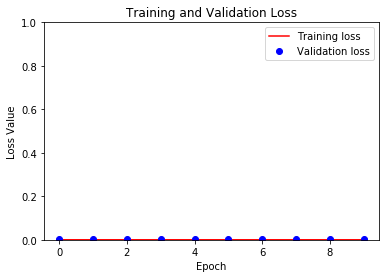

In [63]:
loss = model_history.history['loss']
val_loss = model_history.history['val_loss']

epochs = range(EPOCHS)

plt.figure()
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'bo', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss Value')
plt.ylim([0, 1])
plt.legend()
plt.show()

## Make predictions

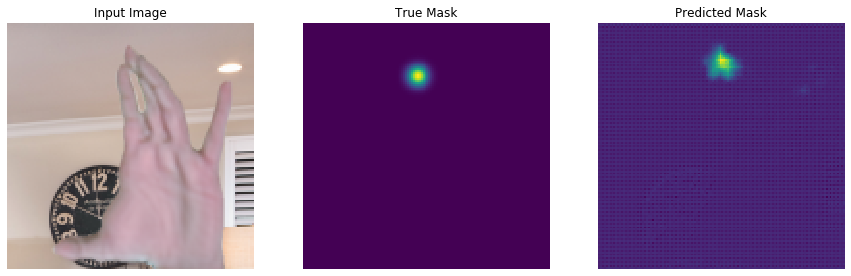

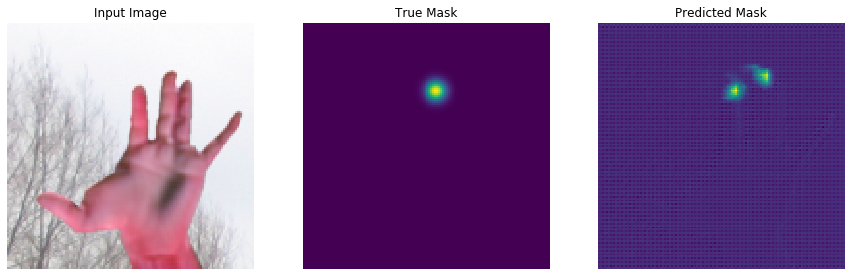

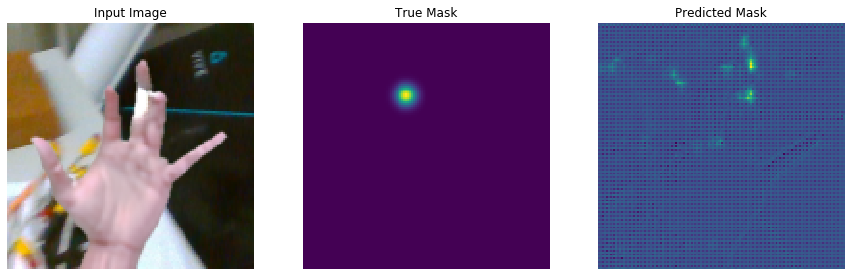

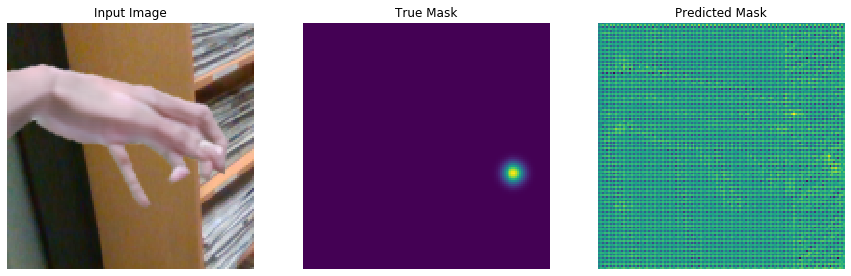

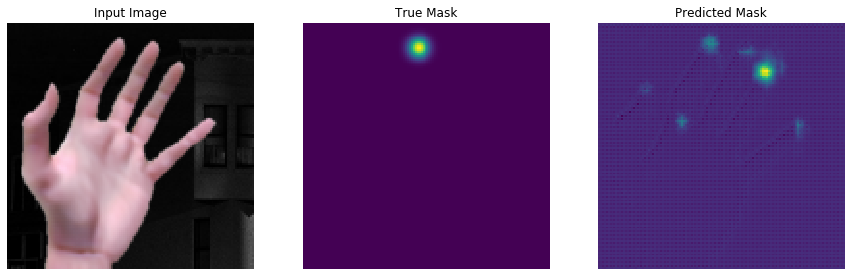

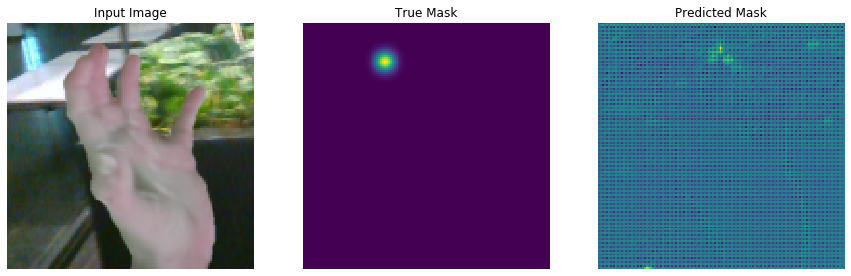

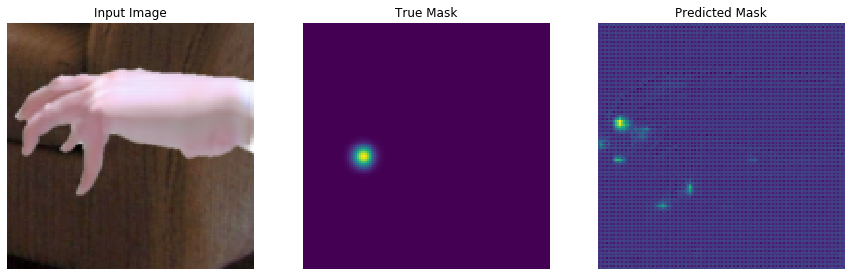

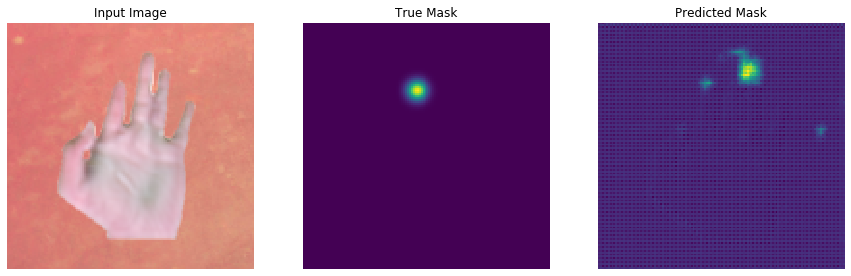

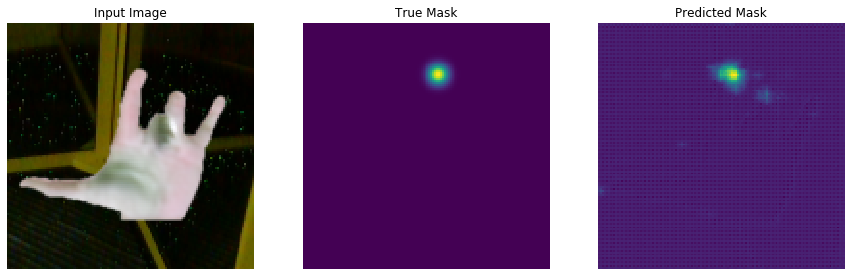

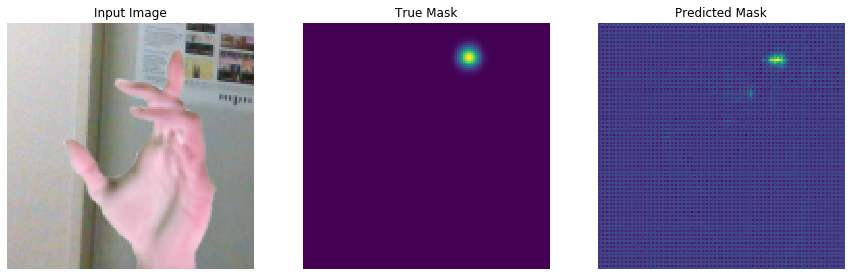

In [60]:
show_predictions(test_dataset, 3)